In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [5]:
# df = pd.DataFrame(data)
file_path = "../datasets/train_set2.csv"
df = pd.read_csv(file_path)

EMPTYCONST = "*empty*"

# Concatenate relevant text features
catFamily = df["Family"].fillna(EMPTYCONST)
catSubFamily = df["SubFamily"].fillna(EMPTYCONST)
catObjectGroup = df["ObjectGroup"].fillna(EMPTYCONST)
catObjectName = df["ObjectName"].fillna(EMPTYCONST)
catDescription = df["Description"].fillna(EMPTYCONST)
catTypeComments = df["Type Comments"].fillna(EMPTYCONST)
catStructuralMaterial = df["Structural Material"].fillna(EMPTYCONST)
catMaterial = df["Material"].fillna(EMPTYCONST)


df["Features"] = (
    catFamily
    + "|"
    + catSubFamily
    + "|"
    + catObjectGroup
    + "|"
    + catObjectName
    + "|"
    + catDescription
    + "|"
    + catTypeComments
    + "|"
    + catStructuralMaterial
    + "|"
    + catMaterial
)

# Split data into features (X) and target variable (y)
X = df["Features"]
y = df["Category"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Start timing
start_time = time.time()

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize Random Forest classifier
rf_classifier = SVC()

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test_tfidf)

# End timing
end_time = time.time()

# Calculate total runtime
total_time = end_time - start_time
print(f"Total runtime: {total_time} seconds")
# Save the trained model to a file
model_filename = "svm_tif.pkl"
joblib.dump(rf_classifier, model_filename)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, predictions))

Total runtime: 1.0814380645751953 seconds
Accuracy: 0.9636048526863085

Classification Report:
                                                    precision    recall  f1-score   support

                         Adjustable Louvred Window       0.83      0.83      0.83         6
                              Architectural Column       1.00      1.00      1.00       126
                                         Brickwall       0.00      0.00      0.00         1
                              Cast In-Situ RC Wall       1.00      1.00      1.00         1
                                  Compartment Wall       0.00      0.00      0.00         1
                                      Curtain Wall       1.00      1.00      1.00        66
                                          Dry Wall       1.00      0.33      0.50         3
                     Fire Alarm Fixture and Device       1.00      1.00      1.00         6
                              Fixed Louvred Window       1.00      1.00     

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

Accuracy: 0.6885245901639344

Classification Report:
                                                    precision    recall  f1-score   support

                         Adjustable Louvred Window       0.00      0.00      0.00         1
                              Architectural Column       0.25      1.00      0.40         1
                              Cast In-Situ RC Wall       1.00      0.82      0.90        22
                                      Curtain Wall       1.00      1.00      1.00        14
                     Fire Alarm Fixture and Device       1.00      1.00      1.00        10
                              Fixed Louvred Window       0.00      0.00      0.00         1
                                Fixed Panel Window       1.00      0.60      0.75         5
                                      Floor Finish       0.00      0.00      0.00         9
                                 General Door Item       0.00      0.00      0.00         0
General Door Item (includi

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

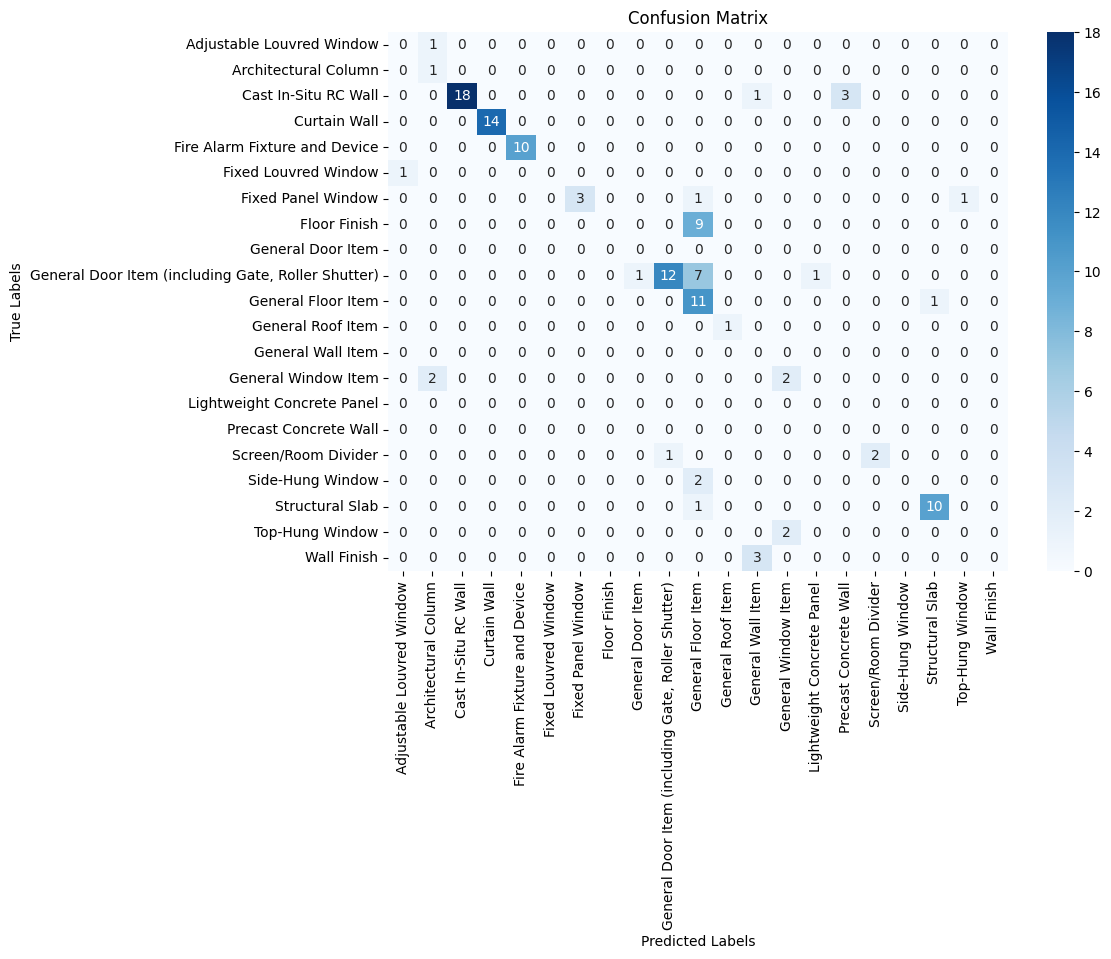

In [6]:
rf_classifier = joblib.load(model_filename)

# Load new data (example: assume `new_data.csv` has the same structure as `train_set.csv`)
new_data_file = "../datasets/test_set.csv"
new_df = pd.read_csv(new_data_file)

# Concatenate relevant text features
catFamily = new_df["Family"].fillna("*empty*")
catSubFamily = new_df["SubFamily"].fillna("*empty*")
catObjectGroup = new_df["ObjectGroup"].fillna("*empty*")
catObjectName = new_df["ObjectName"].fillna("*empty*")
catDescription = new_df["Description"].fillna("*empty*")
catTypeComments = new_df["Type Comments"].fillna("*empty*")
catStructuralMaterial = new_df["Structural Material"].fillna("*empty*")
catMaterial = new_df["Material"].fillna("*empty*")

new_df["Features"] = (
    catFamily
    + "|"
    + catSubFamily
    + "|"
    + catObjectGroup
    + "|"
    + catObjectName
    + "|"
    + catDescription
    + "|"
    + catTypeComments
    + "|"
    + catStructuralMaterial
    + "|"
    + catMaterial
)

# Vectorize text data using the same CountVectorizer instance
X_new_tfidf = vectorizer.transform(new_df["Features"])

# Predict using the loaded model
predictions_new = rf_classifier.predict(X_new_tfidf)

# Calculate accuracy
accuracy = accuracy_score(new_df["Category"], predictions_new)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(new_df["Category"], predictions_new)

# Display classification report
print("\nClassification Report:")
class_report = classification_report(new_df["Category"], predictions_new)
print(class_report)

category_names = []
lines = class_report.splitlines()
for line in lines[2:-4]:  # Skip header and footer lines
    category_name = line.strip().split("       ")[0]
    category_names.append(category_name)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=category_names,
    yticklabels=category_names,  # Use the model's class labels
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()